Data Science - Nanodegree project.

Author: Nguyen Thanh Man

---

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data Introduction

- The data used in this project provides information of suicide cases in major cities from 1985 to 2016, broken down into different gender and age groups, along with the population of each group and some information about the growth of that city during the year. You can find the source of this data [here](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv).



- License of the data can be found [here](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets).

- The data was collected and compiled from 4 sources:

    - [UNDP's Human development index (2018)](http://hdr.undp.org/en/indicators/137506)

    - [World Bank's World development indicators: GDP (current US$) by country: 1985 to 2016 (2018)](http://databank.worldbank.org/data/source/world-development-indicators#)

    - [Szamil's Suicide in the Twenty-First Century dataset (2017)](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

    - [World Health Organization's Suicide prevention](http://www.who.int/mental_health/suicide-prevention/en/)


## Exploratory Data Analysis

### Read data to a DataFrame

In [2]:
df = pd.read_csv('./master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Number of rows and columns

In [3]:
num_rows, num_cols = df.shape
print("Dataset has {0} rows and {1} cols".format(num_rows, num_cols))

Dataset has 27820 rows and 12 cols


### Meaning of each column and row

Description for each column:
- **country**: self-explanatory.
- **year**: self-explanatory.
- **sex**: self-explanatory.
- **age**: age group of the record.
- **suicides_no**: number of suicides.
- **population**: the population that belongs to the respective age group and country.
- **suicides/100k pop**: the suicide rate of the respective age group per 100k population.
- **country-year**: the concatenation of **country** and **year** (this is redundant and will be removed).
- **HDI for year**: The [Human Development Index](https://vi.wikipedia.org/wiki/Ch%E1%BB%89_s%E1%BB%91_ph%C3%A1t_tri%E1%BB%83n_con_ng%C6%B0%E1%BB%9Di) of the country in the respective year.
- **gdp_for_year**: GDP of the respective year and country.
- **gdp_per_capita**: GDP over population.
- **generation**: the generation that belongs in this age group (this column has a problem that I will get into later).

Each row is statistics of suicides and the respective country, age group, gender for each year.

### Data types of columns

In [4]:
col_dtypes = df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

## Preprocessing

### As mention above, **contry-year** is just the concatenation of country and year, so we can remove this column.

In [5]:
df.drop(columns='country-year', inplace=True)

### Rename columns so that they makes more sense

In [6]:
df.rename(columns={
    df.columns[2]: 'gender',
    df.columns[4]: 'nsuicides',
    df.columns[6]: 'crudeRate',
    df.columns[7]: 'HDIyear',
    df.columns[8]: 'GDPyear',
    df.columns[9]: 'GDPcap'
},
          inplace=True)

### Remove suffix ' years' in the "age" column.

In [7]:
df.age = df.age.str.replace(' years', '')

### Fix all "5-14"s in "age" column so they can be sorted correctly

In [8]:
df.loc[df.age == '5-14', 'age'] = '05-14'

### Change dtype of "GDPyear" to numeric

In [9]:
df.GDPyear = df.GDPyear.str.replace(',', '') #removing commas
df.GDPyear = pd.to_numeric(df.GDPyear)

## Let's get back to EDA



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     27820 non-null  object 
 1   year        27820 non-null  int64  
 2   gender      27820 non-null  object 
 3   age         27820 non-null  object 
 4   nsuicides   27820 non-null  int64  
 5   population  27820 non-null  int64  
 6   crudeRate   27820 non-null  float64
 7   HDIyear     8364 non-null   float64
 8   GDPyear     27820 non-null  int64  
 9   GDPcap      27820 non-null  int64  
 10  generation  27820 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.3+ MB


### Ranges of numeric columns

In [11]:
numeric_cols = [
    "nsuicides", "population", "crudeRate", "HDIyear", "GDPyear", "GDPcap"
]
col_ranges_df = pd.DataFrame()
col_ranges_df['min'] = df[numeric_cols].min()
col_ranges_df['max'] = df[numeric_cols].max()
col_ranges_df = col_ranges_df.T.astype(df[numeric_cols].dtypes.to_dict())
col_ranges_df

,nsuicides,population,crudeRate,HDIyear,GDPyear,GDPcap
min,0,278,0.00,0.483,46919625,251
max,22338,43805214,224.97,0.944,18120714000000,126352


### Let's inspect categorical columns

In [12]:
cat_cols = ["year", "country", "gender", "age"]
cat_col_ranges_df = pd.DataFrame(columns=cat_cols)
cat_col_ranges_df.loc["NumUniqueVals"] = [
    df[col].nunique() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df.loc["SomeFirstVals"] = [
    np.sort(df[col].unique())[:3].tolist() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df

,year,country,gender,age
NumUniqueVals,32,101,2,6
SomeFirstVals,"[1985, 1986, 1987]","[Albania, Antigua and Barbuda, Argentina]","[female, male]","[05-14, 15-24, 25-34]"


### Missing data analysis: What are the missing value percentages of each column?

In [13]:
col_num_nans = np.round(df.isnull().mean() * 100, 1)
col_num_nans

country        0.0
year           0.0
gender         0.0
age            0.0
nsuicides      0.0
population     0.0
crudeRate      0.0
HDIyear       69.9
GDPyear        0.0
GDPcap         0.0
generation     0.0
dtype: float64

Removing "HDIyear" since it has nearly 70% missing values.

In [14]:
df.drop(columns='HDIyear', inplace=True)

### Problem with **generation** column

In [15]:
df.groupby(['year', 'generation']).age.unique().unstack().loc[1985:1986]

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
1985,[25-34],"[55-74, 75+]","[15-24, 05-14]",NaN,NaN,[35-54]
1986,[25-34],"[55-74, 75+]","[15-24, 05-14]",NaN,NaN,[35-54]


Generation is defined by a person's **year of birth**, not **age number**. Therefore, the corresponding age group of a generation must differ from year to year. For example, if the age group is 55+ in 1985 like the data describe, then in 1986 it should be 56+, which is not the case.


In [16]:
df.groupby(['year', 'generation']).age.unique().unstack().loc[[2015]]

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
2015,[55-74],NaN,[35-54],[05-14],"[15-24, 25-34]",[75+]


In fact, people divide generations completely differently than data. According to the article [The Whys and Hows of Generations Research](https://www.pewresearch.org/politics/2015/09/03/the-whys-and-hows-of-generations-research/), in 2015 , the generation of Milenials has an age range of 18 to 34, which is different from the data being from 15 to 34.



There are misconceptions about generation in this data, therefore it would be better to remove this column.


In [17]:
df.drop(columns='generation', inplace=True)

---

## Questions of interest

### <span class="burk">Question 1</span> ***For each year, what country has the highest suicide rate?***

In [18]:
gb_df = df.groupby(['country', 'year'])
crudeRateGeneral = (gb_df.nsuicides.sum() /
                    (gb_df.population.sum() / 100000)).unstack()

In [19]:
most_concerning_countries = crudeRateGeneral.agg(['idxmax', 'max']).T
most_concerning_countries['max'] = most_concerning_countries['max'].apply(
    lambda x: round(x, 2))
most_concerning_countries.columns = [
    "Country with highest rate", "Highest rate"
]
most_concerning_countries

,Country with highest rate,Highest rate
year,,
1985,Sri Lanka,40.90
1986,Sri Lanka,37.90
1987,Finland,29.54
1988,Finland,30.26
1989,Finland,30.36
1990,Finland,32.34
1991,Hungary,40.92
1992,Hungary,41.00
1993,Russian Federation,40.56


[Lithuania](https://en.wikipedia.org/wiki/Suicide_in_Lithuania) has the [highest](https://theculturetrip.com/europe/lithuania/articles/this-country-has-among-the-highest-suicide-rates-in-the-world/) suicide rate  from 1995 to 2016.

### <span class="burk">Question 2</span> ***Does it get better?***

To answer this question, let's find the trend in suicide rate for every country over years. To do that we will use a simple linear regression model "$y = ax+b$" (in this case $y$ is `crudeRateGeneral` and $x$ is `year`). So if $a$ is more "negative", things are getting better.


Countries with just a few records cannot display a clear trend, therefore we specifically only keep countries with more than 15 entries.

In [20]:
crudeRateGeneral.dropna(thresh=16, inplace=True)

In [21]:
a = []
for i in range(crudeRateGeneral.shape[0]):
    Y = crudeRateGeneral.iloc[[i]].dropna(axis=1)
    X = np.array(Y.columns)
    Y = np.array(Y).T
    Y = np.hstack((Y, np.ones(Y.shape)))
    X = X.reshape((Y.shape[0], 1))
    a.append((LinearRegression().fit(X, Y).coef_)[0, 0])
a = np.array(a)

In [22]:
result = pd.Series(data=a, index=crudeRateGeneral.index)
result.sort_values(inplace=True)
result

country
Estonia             -1.308874
Latvia              -1.037742
Lithuania           -0.933651
Hungary             -0.783661
Slovenia            -0.649019
                       ...   
Chile                0.268346
Uruguay              0.312896
Suriname             0.536502
Guyana               0.925073
Republic of Korea    0.930579
Length: 81, dtype: float64

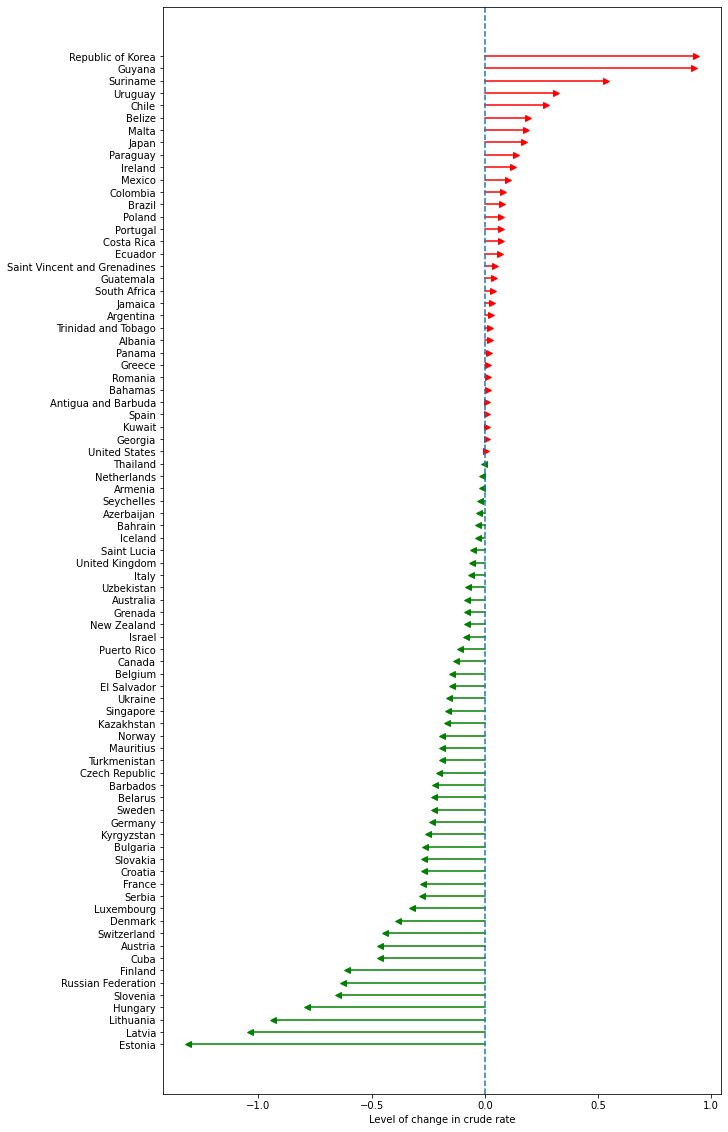

In [23]:
plt.figure(figsize=[10, 20])
for (value, index) in zip(result.values, result.index):
    if value > 0:
        plt.plot([0, value], [index, index], c='r')
        plt.plot(value, index, 'r>')
    else:
        plt.plot([0, value], [index, index], c='g')
        plt.plot(value, index, 'g<')
plt.axvline(x=0, ls='--')
plt.xlabel("Level of change in crude rate");

- Top 3 countries with increasing trend in suicide rate: Korea, Guyana and Suriname.
- Top 3 countries with decreasing trend in suicide rate: Estonia, Latvia and Lithuania.

Interesting point: Lithuania although has the highest suicide rate, but is among the top 3 countries with decreasing suicide rate.

In [24]:
icr = np.round(np.mean(a > 0) * 100, 1)
dcr = np.round(np.mean(a < 0) * 100, 1)
print(
    "In valid countries, there are about {0}% of countries with increasing crude rate and about {1}% with decreasing crude rate"
    .format(icr, dcr))

In valid countries, there are about 40.7% of countries with increasing crude rate and about 59.3% with decreasing crude rate


There are more countries with decreasing suicide rate trend than the ones with increasing trend. Hooray!

### <span class="burk">Question 3</span> ***Does having a better living condition decreases suicide rate?***

We all know that as time goes, living condition gets better. Let's check this statement again using correlation coefficent between `year` and `GDPcap`.

In [25]:
GDPcap = gb_df.GDPcap.unique().unstack().dropna(thresh=16)
GDPcap.sample(5)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Thailand,[840],[911],[1045],NaN,NaN,[1666],[1891],[2120],NaN,[2784],...,[4461],[4921],[4736],[5707],[6153],[6584],[6917],[6662],[6552],[6713]
Ecuador,[2238],[1943],[1669],[1519],[1619],[1732],[1869],[1955],[1996],[2335],...,[4024],[4787],[4762],[5206],[5836],[6364],[6769],[7116],[6832],NaN
Saint Lucia,NaN,[2634],[2875],[3244],[3505],[4015],[4194],[4564],[4568],[4704],...,NaN,[8122],[7902],[8557],[8826],[8764],[9041],[9372],NaN,NaN
Portugal,[2912],[4145],[5138],[5995],[6436],[8356],[9483],[11445],[10098],[10566],...,[24003],[26121],[24254],[23673],[24337],[21573],[22641],[23091],NaN,NaN
Sweden,NaN,NaN,[22813],[25731],[26978],[32246],[33623],[34721],[25880],[27658],...,[56531],[59155],[49070],[55352],[63380],[60776],[64133],[62956],[54629],[55594]


In [26]:
avg_r = 0
for i in range(GDPcap.shape[0]):
    X = GDPcap.iloc[i].dropna().apply(lambda x: x[0])
    Y = np.array(X.index)
    X = np.array((X - X.mean()) / X.std())
    Y = (Y - Y.mean()) / Y.std()
    avg_r += np.mean(X * Y) / GDPcap.shape[0]
print("Average corelation coefficent:", np.round(avg_r, 2))

Average corelation coefficent: 0.88


GDP per population increase over time, which means people are having better living condition, and there should be less suicides, right? In <span class="burk">Question 2</span> we discovered that suicide rate trend is different for each country. **It means that a better quality of life does not always make people happier, or simply put: "Money doesn't always make you happy".**

### <span class="burk">Question 4</span> ***Over years, which age group has the most suicide cases and suicide rate?***

In [27]:
gb_age_df = df.groupby(['year', 'age'])
nsuicidesAge = gb_age_df.nsuicides.sum().unstack()
crudeRateAge = (gb_age_df.nsuicides.sum() /
                (gb_age_df.population.sum() / 100000)).unstack()

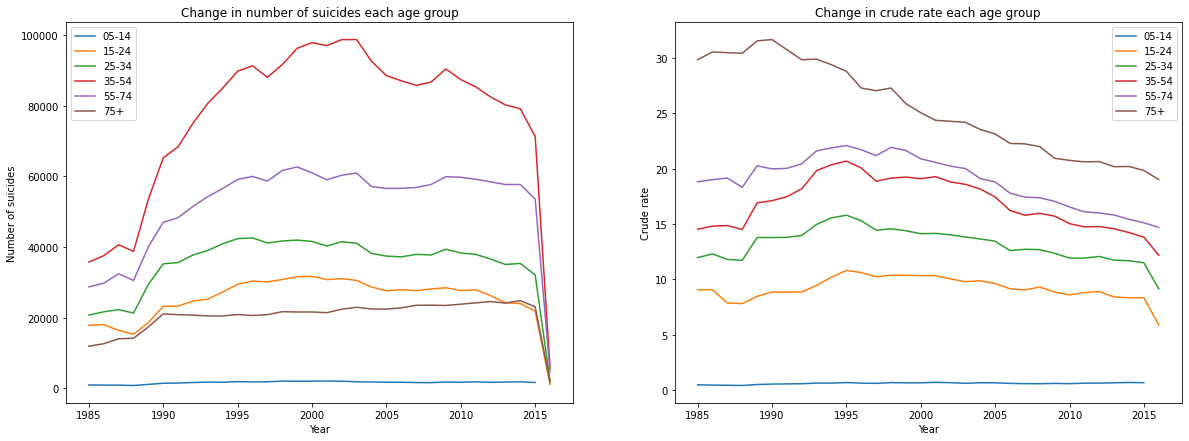

In [28]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
plt.plot(nsuicidesAge)
plt.legend(nsuicidesAge.columns)
plt.title("Change in number of suicides each age group")
plt.ylabel("Number of suicides")
plt.xlabel("Year")
plt.subplot(1, 2, 2)
plt.plot(crudeRateAge)
plt.legend(crudeRateAge.columns)
plt.title("Change in crude rate each age group")
plt.ylabel("Crude rate")
plt.xlabel("Year");

Group "35-54" and "75+" are the most concerning.
- Group "35-54" always has the most suicide cases.
- Group "75+" always has the highest suicide rate.

This means:
- If there is a person died of suicide then chances are he/she belongs to age group "35-54".
- People aged 75+ have the highest risk of suicide.

### <span class="burk">Question 5</span> ***Gender-related differences***

In [29]:
gender_gb_df = df.groupby(['year', 'gender'])
gender_rate = (gender_gb_df.nsuicides.sum() /
               (gender_gb_df.population.sum() / 100000)).unstack()

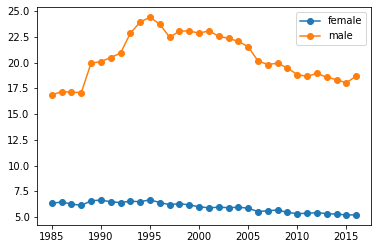

In [30]:
plt.plot(gender_rate, marker='o')
plt.legend(gender_rate.columns);

- Female suicide rate generally decreases over time
- Male suicide rate peaked in 1995 and then declined thereafter.
- Men have a higher risk of suicide than women.


---

# References

[Hey you!! Suicide is not a solution](https://www.kaggle.com/snanilim/hey-you-suicide-is-not-a-solution)

[Suicides over different perspectives](https://www.kaggle.com/papeloto/suicides-over-different-perspectives)

[The Whys and Hows of Generations Research](https://www.pewresearch.org/politics/2015/09/03/the-whys-and-hows-of-generations-research/)